In [14]:
import plots
import lowLevelFeatures as ll
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import random
from sklearn import preprocessing
import matplotlib.pyplot as plt
from plots import degrees
import math
import chordModel
import numpy as np
import os
from scipy.stats import beta

os.chdir(os.environ['JAZZ_HARMONY_DATA_ROOT'] + "/JazzHarmonyCorpus")

cep = ll.ChromaEvaluationParameters(stepSize=2048, smoothingTime=1.2)
chromaEvaluator = ll.AnnotatedChromaEvaluator(cep)
chromas = chromaEvaluator.loadChromasForAnnotationFileListFile('ready.txt')
maj = preprocessing.normalize(chordModel.substituteZeros(chromas.chromas[chromas.kinds == 'dim']), norm='l1')
print "Degrees ordered by:   "
print "Strength (mean value):", plots.sortedDegrees(maj, method='mean')
print "Entropy:              ", plots.sortedDegrees(maj, method='entropy')
print "Likelyhood (inverted):", plots.sortedDegrees(maj, method='beta-likelihood', flip=True)

Degrees ordered by:   
Strength (mean value): ['V' 'II' 'III' 'VIIb' 'IV' 'VIb' 'VII' 'IIb' 'VI' 'I' 'IIIb' 'Vb']
Entropy:               ['V' 'III' 'II' 'VIIb' 'VIb' 'IV' 'VII' 'IIb' 'VI' 'I' 'Vb' 'IIIb']
Likelyhood (inverted): ['V' 'III' 'II' 'VIIb' 'VIb' 'IV' 'VII' 'IIb' 'VI' 'I' 'Vb' 'IIIb']


# Strongest degrees have highest entropy

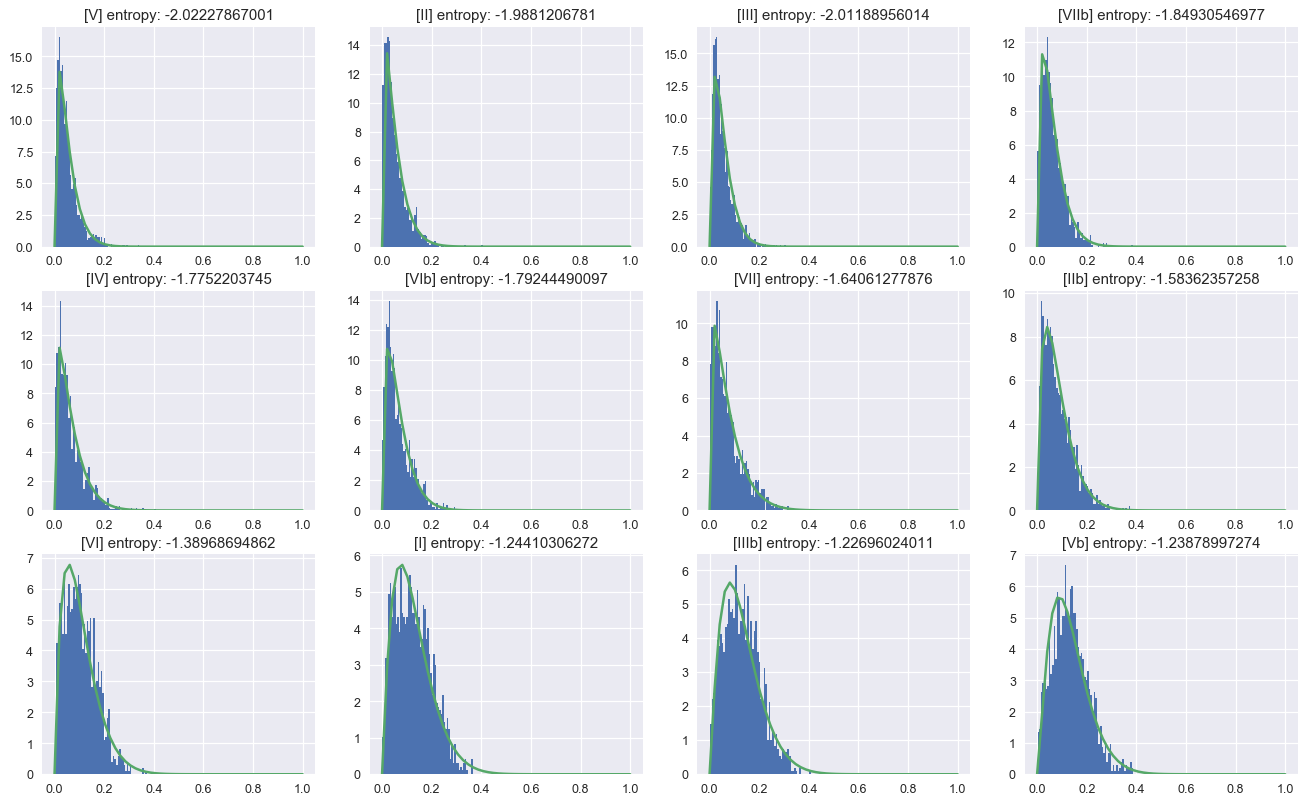

In [15]:
fig, ax = plt.subplots(nrows=3,ncols=4,figsize=(18, 11), dpi= 90, facecolor='w', edgecolor='k')
ax = np.reshape(np.array(ax), (1, np.size(ax)))[0]
sortedDegrees = plots.sortedDegrees(maj, method='mean')
for i in xrange(len(sortedDegrees)):
    a = plots.estimatePartition([degrees.index(sortedDegrees[i])], maj)
    params = beta.fit(a, floc=0, fscale=1)
    myHist = ax[i].hist(a, 60, normed=True)
    rv = beta(*params)
    x = np.linspace(0,1)
    ax[i].plot(x, rv.pdf(x), lw=2)
    #ax[i].plot(x, rv.cdf(x), lw=2)
    ax[i].set_title('[' + sortedDegrees[i] + '] entropy: ' + str(rv.entropy()))
    
plt.show()

# Simple model tends to ignore strong degrees relationships

In [3]:
def plotLifeModel(chromas, model):
    sortedDegrees = plots.sortedDegrees(chromas)
    print plots.sortedDegrees(chromas)
    print plots.sortedDegrees(chromas, method='entropy')
    print plots.sortedDegrees(chromas, method='beta-likelihood', flip=True)
    fig, ax = plt.subplots(nrows=2,ncols=2,figsize=(12, 10), dpi= 90, facecolor='w', edgecolor='k')
    plots.plotStrongWeakHexagrams(ax[0][0], ax[0][1], chromas, sortedDegrees, step = 60)
    gen,_= model.sample(8000)
    # back to chroma
    sampled = np.apply_along_axis(chordModel.invilr, 1, gen)
    print plots.sortedDegrees(sampled)
    print plots.sortedDegrees(sampled, method='entropy')
    print plots.sortedDegrees(sampled, method='beta-likelihood', flip=True)
    plots.plotStrongWeakHexagrams(ax[1][0], ax[1][1], sampled, sortedDegrees, step = 60)
    ax[0][0].set_title("Real life/weakest")
    ax[0][1].set_title("Real life/strongest")
    ax[1][0].set_title("Model/weakest")
    ax[1][1].set_title("Model/strongest")
    plt.show()

# Major

['IIb' 'VIIb' 'VIb' 'Vb' 'IIIb' 'IV' 'II' 'VII' 'VI' 'III' 'V' 'I']
['IIb' 'VIb' 'VIIb' 'Vb' 'IIIb' 'IV' 'II' 'VII' 'VI' 'III' 'V' 'I']
['IIb' 'VIb' 'VIIb' 'Vb' 'IIIb' 'IV' 'II' 'VII' 'VI' 'III' 'V' 'I']
['IIb' 'VIIb' 'VIb' 'Vb' 'IIIb' 'IV' 'II' 'VII' 'VI' 'III' 'V' 'I']
['IIb' 'VIb' 'VIIb' 'Vb' 'IIIb' 'IV' 'II' 'VII' 'VI' 'III' 'V' 'I']
['IIb' 'VIb' 'VIIb' 'Vb' 'IIIb' 'IV' 'II' 'VII' 'VI' 'III' 'V' 'I']


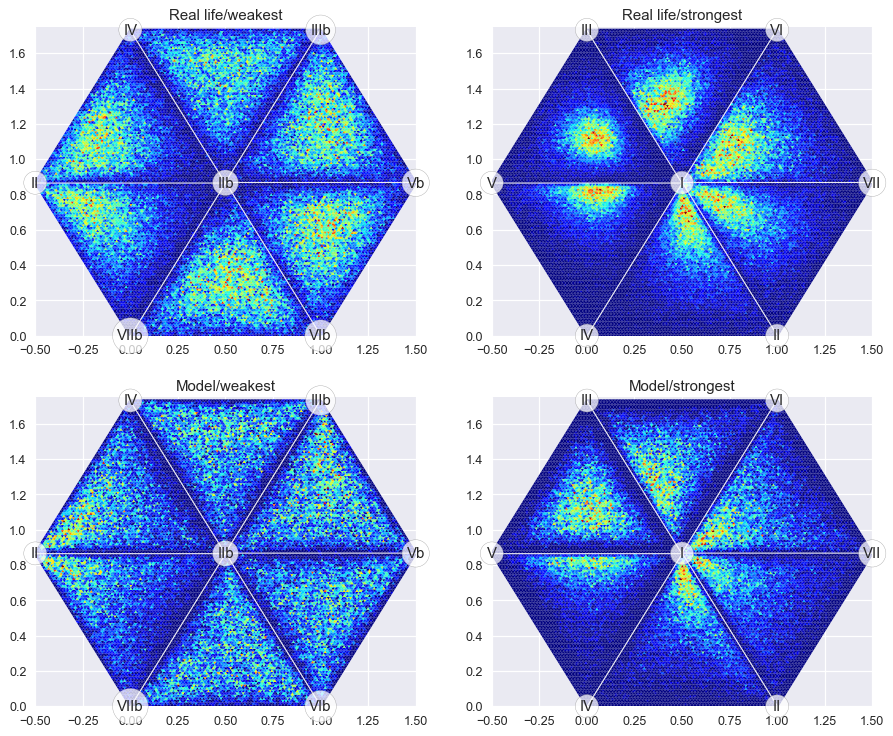

In [4]:
plotLifeModel(maj, chordModel.loadModel('folds/model_1.pkl').gmms[0])

*Conclusion*: maximize likelihood on the whole set of chords (60) and/or enforce strong degrees relationships modelling.

# Minor

['IIb' 'III' 'Vb' 'VIb' 'VII' 'VI' 'II' 'IV' 'VIIb' 'IIIb' 'V' 'I']
['IIb' 'III' 'Vb' 'VIb' 'VII' 'VI' 'II' 'VIIb' 'IV' 'IIIb' 'V' 'I']
['IIb' 'III' 'Vb' 'VIb' 'VII' 'VI' 'II' 'VIIb' 'IV' 'IIIb' 'V' 'I']
['IIb' 'III' 'VIb' 'Vb' 'VII' 'VI' 'II' 'IV' 'VIIb' 'IIIb' 'V' 'I']
['IIb' 'III' 'VIb' 'Vb' 'VII' 'VI' 'II' 'IV' 'VIIb' 'IIIb' 'V' 'I']
['IIb' 'III' 'VIb' 'Vb' 'VII' 'VI' 'II' 'IV' 'VIIb' 'IIIb' 'V' 'I']


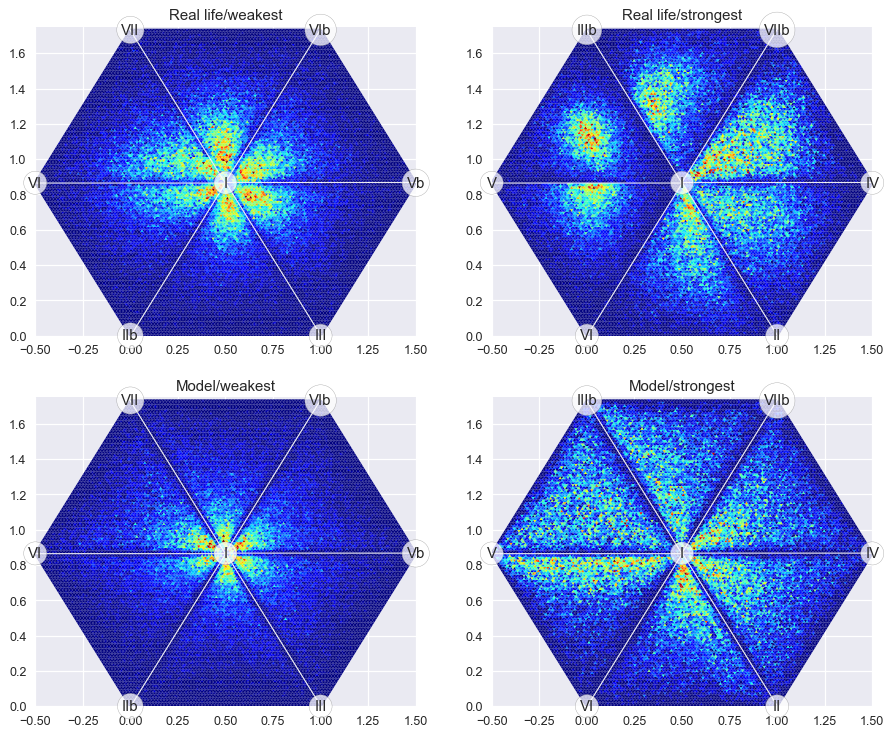

In [56]:
min = preprocessing.normalize(chordModel.substituteZeros(chromas.chromas[chromas.kinds == 'min']), norm='l1')
plotLifeModel(min, chordModel.loadModel('folds/model_1.pkl').gmms[1])

# Dominant

['IIb' 'Vb' 'VIb' 'IIIb' 'VII' 'VI' 'IV' 'II' 'VIIb' 'III' 'V' 'I']
['Vb' 'IIb' 'VIb' 'IIIb' 'VII' 'IV' 'VI' 'II' 'VIIb' 'III' 'V' 'I']
['Vb' 'IIb' 'VIb' 'IIIb' 'VII' 'IV' 'VI' 'II' 'VIIb' 'III' 'V' 'I']
['IIb' 'Vb' 'IIIb' 'VIb' 'VII' 'VI' 'IV' 'II' 'VIIb' 'III' 'V' 'I']
['IIb' 'Vb' 'IIIb' 'VIb' 'VII' 'VI' 'IV' 'II' 'VIIb' 'III' 'V' 'I']
['IIb' 'Vb' 'IIIb' 'VIb' 'VII' 'VI' 'IV' 'II' 'VIIb' 'III' 'V' 'I']


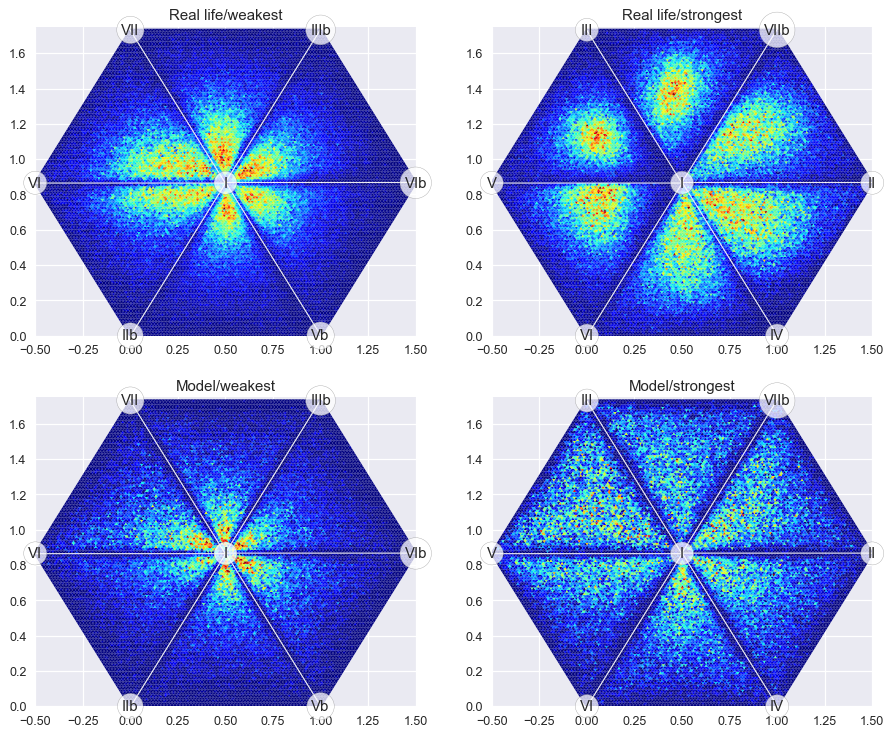

In [57]:
dom = preprocessing.normalize(chordModel.substituteZeros(chromas.chromas[chromas.kinds == 'dom']), norm='l1')
plotLifeModel(dom, chordModel.loadModel('folds/model_1.pkl').gmms[2])

# Half diminished 7

['II' 'VII' 'III' 'VI' 'V' 'VIb' 'IIb' 'IV' 'Vb' 'VIIb' 'I' 'IIIb']
['VII' 'II' 'III' 'VI' 'V' 'IIb' 'VIb' 'IV' 'Vb' 'VIIb' 'I' 'IIIb']
['VII' 'II' 'III' 'VI' 'V' 'IIb' 'VIb' 'IV' 'Vb' 'VIIb' 'I' 'IIIb']
['II' 'III' 'VII' 'VI' 'V' 'VIb' 'IIb' 'IV' 'Vb' 'I' 'VIIb' 'IIIb']
['II' 'III' 'VII' 'VI' 'V' 'VIb' 'IIb' 'IV' 'Vb' 'I' 'VIIb' 'IIIb']
['II' 'III' 'VII' 'VI' 'V' 'VIb' 'IIb' 'IV' 'Vb' 'I' 'VIIb' 'IIIb']


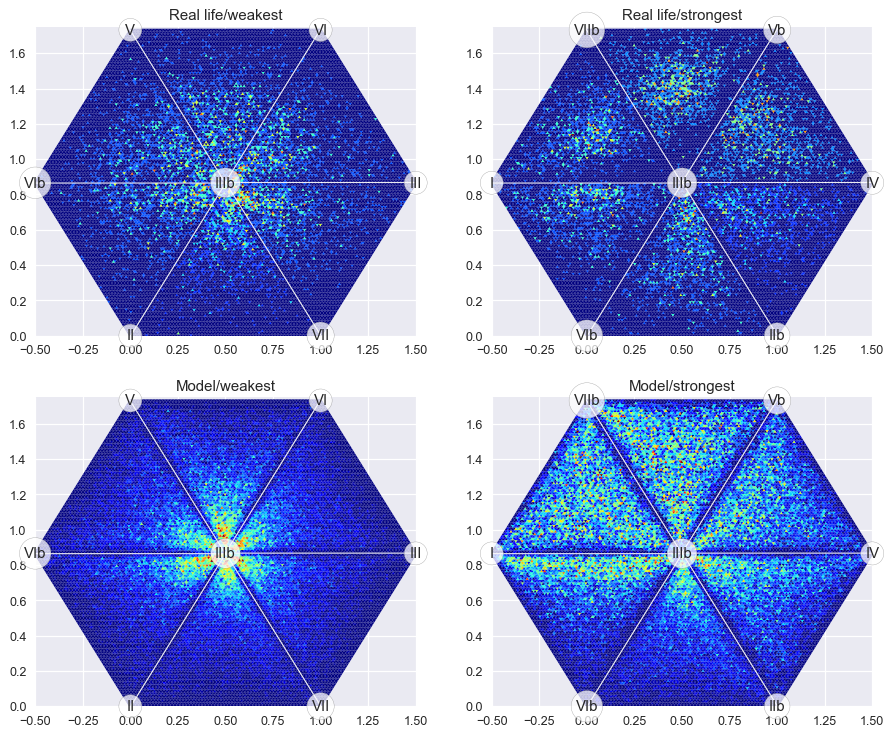

In [58]:
hdim7 = preprocessing.normalize(chordModel.substituteZeros(chromas.chromas[chromas.kinds == 'hdim7']), norm='l1')
plotLifeModel(hdim7, chordModel.loadModel('folds/model_1.pkl').gmms[3])

# Diminished

['III' 'V' 'II' 'IV' 'VIIb' 'VIb' 'VII' 'IIb' 'VI' 'IIIb' 'I' 'Vb']
['III' 'V' 'II' 'IV' 'VIIb' 'VIb' 'VII' 'IIb' 'VI' 'IIIb' 'I' 'Vb']
['III' 'V' 'II' 'IV' 'VIIb' 'VIb' 'VII' 'IIb' 'VI' 'IIIb' 'I' 'Vb']
['II' 'V' 'III' 'IV' 'VIIb' 'VIb' 'VII' 'IIb' 'VI' 'IIIb' 'I' 'Vb']
['II' 'V' 'III' 'IV' 'VIIb' 'VIb' 'VII' 'IIb' 'VI' 'IIIb' 'I' 'Vb']
['II' 'V' 'III' 'IV' 'VIIb' 'VIb' 'VII' 'IIb' 'VI' 'IIIb' 'I' 'Vb']


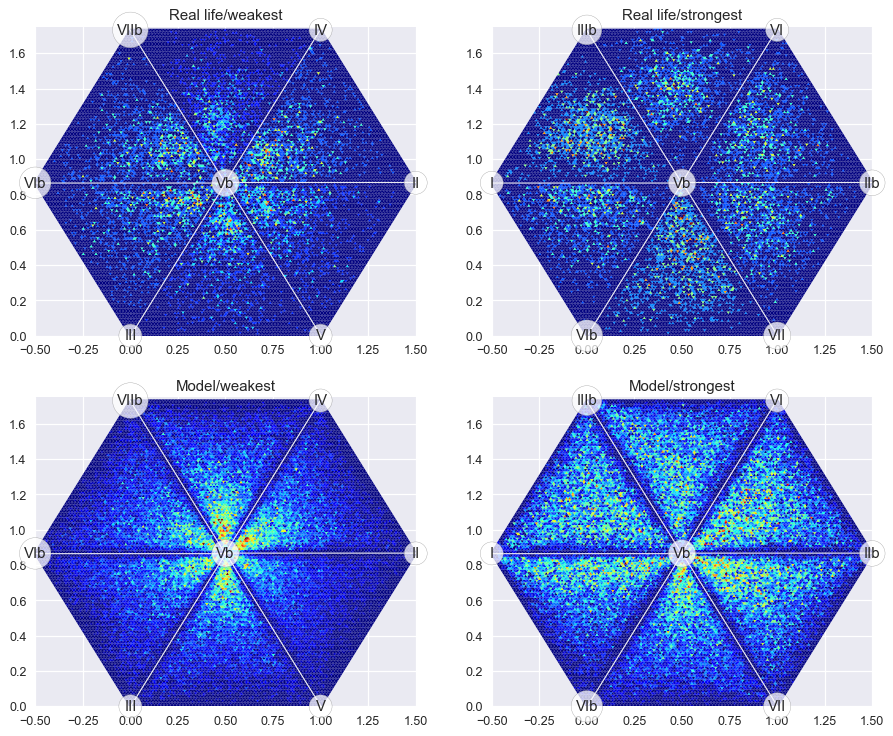

In [59]:
dim = preprocessing.normalize(chordModel.substituteZeros(chromas.chromas[chromas.kinds == 'dim']), norm='l1')
plotLifeModel(dim, chordModel.loadModel('folds/model_1.pkl').gmms[4])

## Dirichlet demo

['IIIb' 'I' 'V' 'IIb' 'VII' 'VIIb' 'IV' 'III' 'Vb' 'VIb' 'VI' 'II']
['IIIb' 'I' 'IIb' 'V' 'VIIb' 'VII' 'III' 'IV' 'Vb' 'VIb' 'VI' 'II']
['IIIb' 'I' 'IIb' 'V' 'VIIb' 'VII' 'III' 'IV' 'Vb' 'VIb' 'VI' 'II']
['IIb' 'VIIb' 'VIb' 'Vb' 'IIIb' 'IV' 'II' 'VII' 'VI' 'III' 'V' 'I']
['IIb' 'VIb' 'VIIb' 'Vb' 'IIIb' 'IV' 'II' 'VII' 'VI' 'III' 'V' 'I']
['IIb' 'VIb' 'VIIb' 'Vb' 'IIIb' 'IV' 'II' 'VII' 'VI' 'III' 'V' 'I']


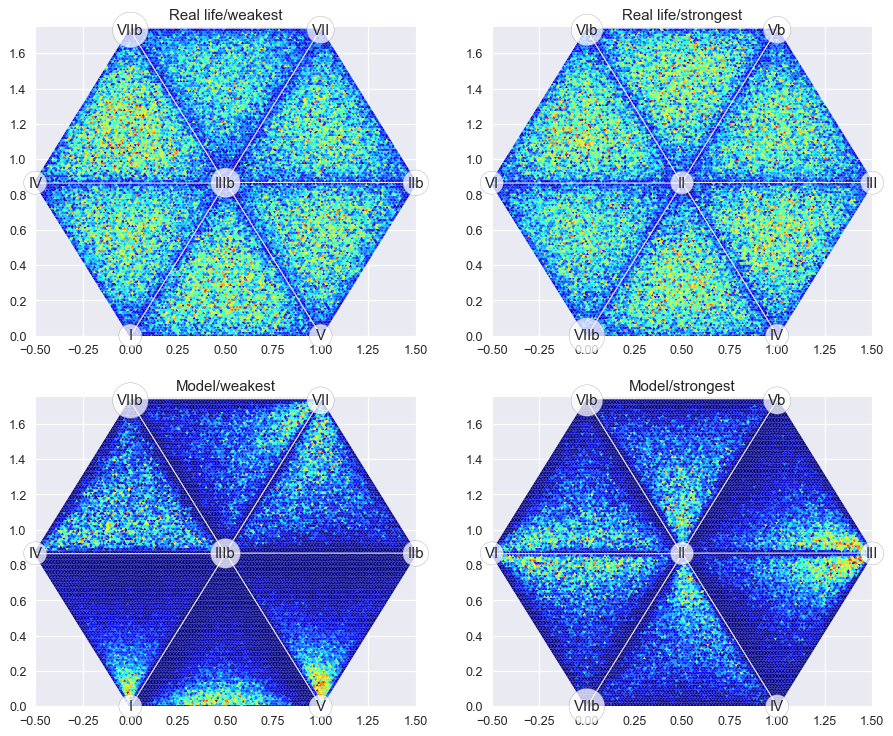

In [9]:
from scipy.stats import dirichlet
d = dirichlet.rvs([1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3,1.3], 20000)
#d = dirichlet.rvs([1,1,1,1,1,1,1,1,1,1,1,1], 20000)

#partition = [degrees.index('I'), degrees.index('II'), degrees.index('III'),  degrees.index('IV'), degrees.index('V'), degrees.index('VI'), degrees.index('VII')]
#a = plots.estimatePartition(partition, d)
#sns.distplot(a)
#plt.show()
plotLifeModel(d, chordModel.loadModel('folds/model_1.pkl').gmms[0])